In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
fatrat = pd.read_csv(r"C:\Users\s1003099\Downloads\FatRats.csv")

In [5]:
fatrat.head()

,Gain,Protein,Source
0,73,Hi,Beef
1,102,Hi,Beef
2,118,Hi,Beef
3,104,Hi,Beef
4,81,Hi,Beef


In [7]:
fatrat

,Gain,Protein,Source
0,73,Hi,Beef
1,102,Hi,Beef
2,118,Hi,Beef
3,104,Hi,Beef
4,81,Hi,Beef
5,107,Hi,Beef
6,100,Hi,Beef
7,87,Hi,Beef
8,117,Hi,Beef
9,111,Hi,Beef


In [8]:
from statsmodels.formula.api import ols

In [17]:
model = ols('Gain ~ C(Protein) + C(Source) + C(Protein):C(Source)', data = fatrat).fit()

In [18]:
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(Protein),3139.266667,1.0,14.655773,0.000338
C(Source),271.600000,2.0,0.633987,0.534375
C(Protein):C(Source),1165.733333,2.0,2.721133,0.074827
Residual,11566.800000,54.0,NaN,NaN


In [36]:
oneway = ols('Gain~Source', data = fatrat).fit()

In [22]:
sm.stats.anova_lm(oneway, typ = 2)

,sum_sq,df,F,PR(>F)
Source,271.6,2.0,0.487695,0.616579
Residual,15871.8,57.0,NaN,NaN


In [52]:
np.random.seed(0)
import matplotlib.pyplot as plt


(array([ 3.,  2.,  3.,  8.,  8., 10., 11.,  6.,  6.,  3.]),
 array([-38.9, -31.8, -24.7, -17.6, -10.5,  -3.4,   3.7,  10.8,  17.9,
         25. ,  32.1]),
 <BarContainer object of 10 artists>)

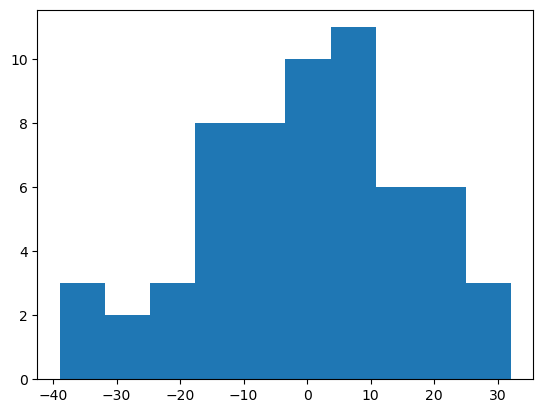

In [34]:
mean = fatrat.Gain.mean()
residuals = fatrat.Gain -mean
plt.hist(residuals, bins = 10)

In [41]:
model_resids = oneway.resid

In [42]:
model_norm_resids = oneway.get_influence().resid_studentized_internal

In [50]:
fitted = oneway.fittedvalues

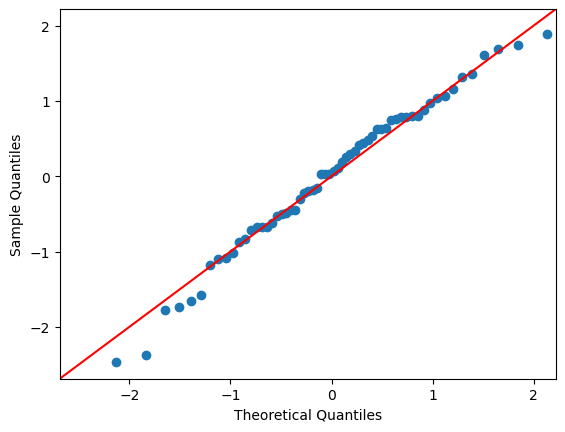

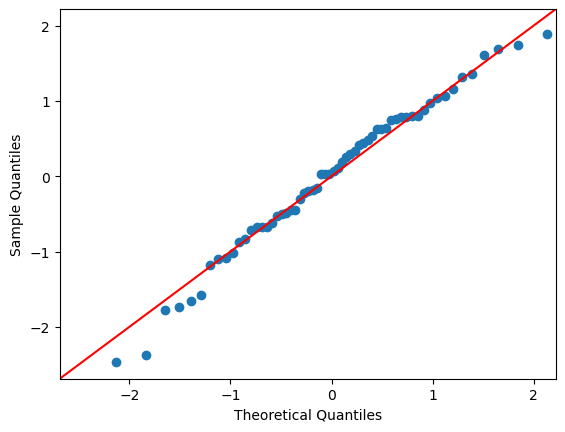

In [45]:
sm.qqplot(model_norm_resids, line = '45')

<function matplotlib.pyplot.show(close=None, block=None)>

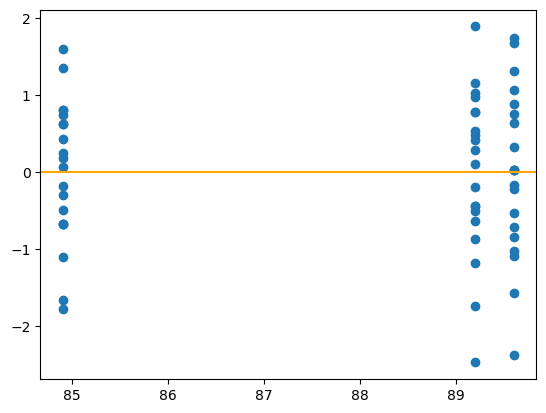

In [61]:
plt.scatter(fitted, model_norm_resids)

plt.axhline(0,color = "orange")
plt.show